# Getting Started on Natural Language Processing with Python

### Nitin Madnani (nmadnani@ets.org)

**Note**: This is a completely revised version of the article that was originally published in ACM Crossroads, Volume 13, Issue 4. Revisions were needed because of major changes to the Natural Language Toolkit project. The code in this notebook conforms to the latest version of NLTK (v3.0.1 as of March 2015) and works only with Python 3. Although the code is always tested, it is possible that a bug or two may have been introduced in the code during the course of this revision. If you find any, please report them to the author. If you are still using version 0.7 of the toolkit for some reason, please refer to http://www.acm.org/crossroads/xrds13-4/natural_language.html.

## 1. Motivation

The intent of this article is to introduce the readers to the area of Natu- ral Language Processing, commonly referred to as NLP. However, rather than just describing the salient concepts of NLP, this article uses the Python programming language to illustrate them as well. For readers unfamiliar with Python, the article provides a number of references to learn how to program in Python.

## 2. Introduction

### 2.1. Natural Language Processing

The term Natural Language Processing encompasses a broad set of techniques for automated generation, manipulation and analysis of natural or human languages. Although most NLP techniques inherit largely from Linguis- tics and Artificial Intelligence, they are also influenced by relatively newer areas such as Machine Learning, Computational Statistics and Cognitive Science. Before we see some examples of NLP techniques, it will be useful to introduce some very basic terminology. Please note that as a side effect of keeping things simple, these definitions may not stand up to strict linguistic scrutiny.

- **Token**: Before any real processing can be done on the input text, it needs to be segmented into linguistic units such as words, punctua- tion, numbers or alphanumerics. These units are known as tokens.


- **Sentence**: An ordered sequence of tokens.


- **Tokenization**: The process of splitting a sentence into its constituent tokens. For segmented languages such as English, the existence of whitespace makes tokenization relatively easier and uninteresting. However, for languages such as Chinese and Arabic, the task is more difficult since there are no explicit boundaries. Furthermore, almost all characters in such non-segmented languages can exist as one-character words by themselves but can also join together to form multi-character words.


- **Corpus**: A body of text, usually containing a large number of sentences.


- **Part-of-speech (POS) Tag**: A word can be classified into one or more of a set of lexical or part-of-speech categories such as Nouns, Verbs, Adjectives and Articles, to name a few. A POS tag is a symbol repre- senting such a lexical category - NN(Noun), VB(Verb), JJ(Adjective), AT(Article). One of the oldest and most commonly used tag sets is the Brown Corpus tag set. We will discuss the Brown Corpus in more detail below.


- **Parse Tree**: A tree defined over a given sentence that represents the syntactic structure of the sentence as defined by a formal grammar. Now that we have introduced the basic terminology, let’s look at some com- mon NLP tasks:


- **POS Tagging**: Given a sentence and a set of POS tags, a common language processing task is to automatically assign POS tags to each word in the sentences. For example, given the sentence The ball is red, the output of a POS tagger would be The/AT ball/NN is/VB red/JJ. State-of-the-art POS taggers [9] can achieve accuracy as high as 96%. Tagging text with parts-of-speech turns out to be extremely useful for more complicated NLP tasks such as parsing and machine translation, which are discussed below.


-  **Computational Morphology**: Natural languages consist of a very large number of words that are built upon basic building blocks known as morphemes (or stems), the smallest linguistic units possessing mean- ing. Computational morphology is concerned with the discovery and analysis of the internal structure of words using computers.


- **Parsing**: In the parsing task, a parser constructs the parse tree given a sentence. Some parsers assume the existence of a set of grammar rules in order to parse but recent parsers are smart enough to deduce the parse trees directly from the given data using complex statistical models [1]. Most parsers also operate in a supervised setting and re- quire the sentence to be POS-tagged before it can be parsed. Statistical parsing is an area of active research in NLP.


- **Machine Translation (MT)**: In machine translation,the goal is to have the computer translate the given text in one natural language to fluent text in another language without any human in the loop. This is one of the most difficult tasks in NLP and has been tackled in a lot of different ways over the years. Almost all MT approaches use POS tagging and parsing as preliminary steps.


### 2.2. Python

The Python programming language is a dynamically-typed, object-oriented interpreted language. Although, its primary strength lies in the ease with which it allows a programmer to rapidly prototype a project, its powerful and mature set of standard libraries make it a great fit for large-scale production-level software engineering projects as well. Python has a very shallow learning curve and an excellent online learning resource [11].

### 2.3. Natural Language Toolkit
Although Python already has most of the functionality needed to perform simple NLP tasks, it’s still not powerful enough for most standard NLP tasks. This is where the Natural Language Toolkit (NLTK) comes in [12]. NLTK is a collection of modules and corpora, released under an open-source license, that allows students to learn and conduct research in NLP. The most important advantage of using NLTK is that it is entirely self-contained. Not only does it provide convenient functions and wrappers that can be used as building blocks for common NLP tasks, it also provides raw and pre-processed versions of standard corpora used in NLP literature and courses.

## 3. Using NLTK

The NLTK website contains excellent documentation and tutorials for learn- ing to use the toolkit [13]. It would be unfair to the authors, as well as to this publication, to just reproduce their words for the sake of this article. In- stead, I will introduce NLTK by showing how to perform four NLP tasks, in increasing order of difficulty. Each task is either an unsolved exercise from the NLTK tutorial or a variant thereof. Therefore, the solution and analysis of each task represents original content written solely for this article.

### 3.1. NLTK Corpora

As mentioned earlier, NLTK ships with several useful text corpora that are used widely in the NLP research community. In this section, we look at three of these corpora that we will be using in our tasks below:

- **Brown Corpus**: The Brown Corpus of Standard American English is considered to be the first general English corpus that could be used in computational linguistic processing tasks [6]. The corpus consists of one million words of American English texts printed in 1961. For the corpus to represent as general a sample of the English language as possible, 15 different genres were sampled such as Fiction, News and Religious text. Subsequently, a POS-tagged version of the corpus was also created with substantial manual effort.


- **Gutenberg Corpus**: The Gutenberg Corpus is a selection of 14 texts chosen from Project Gutenberg - the largest online collection of free e-books [5]. The corpus contains a total of 1.7 million words.


- **Stopwords Corpus**: Besides regular content words, there is another class of words called stop words that perform important grammatical functions but are unlikely to be interesting by themselves, such as prepositions, complementizers and determiners. NLTK comes bun- dled with the Stopwords Corpus - a list of 2400 stop words across 11 different languages (including English).

### 3.2. NLTK naming conventions
Before, we begin using NLTK for our tasks, it is important to familiarize ourselves with the naming conventions used in the toolkit. The top-level package is called `nltk` and we can refer to the included modules by using their fully qualified dotted names, e.g. `nltk.corpus` and `nltk.utilities`. The contents of any such module can then be imported into the top-level namespace by using the standard "`from ... import ...`" construct in Python.

### 3.3. Task 1: Exploring Corpora

NLTK is distributed with several NLP corpora, as mentioned before. We define this task in terms of exploring one of such corpora.

**Task**: Use the NLTK corpus module to read the corpus austen-persuasion.txt, included in the Gutenberg corpus collection, and answer the following questions:

- How many total words does this corpus have ?


- How many unique words does this corpus have ?


- What are the counts for the 10 most frequent words ?

Besides the corpus module that allows us to access and explore the bundled corpora with ease, NLTK also provides the probability module that contains several useful classes and functions for the task of computing probability distributions. One such class is called `FreqDist` and it keeps track of the sample frequencies in a distribution. 

The next set of cells show how to use these two modules to perform the first task.

In [3]:
# first, import the gutenberg collection
from nltk.corpus import gutenberg

# what corpora are in the collection ?
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [6]:
# import FreqDist class
from nltk import FreqDist

# create frequency distribution object
fd = FreqDist()

# for each token in the relevant text, increment its counter
for word in gutenberg.words('austen-persuasion.txt'):
    fd.inc(word)
    
print(fd.N()) # total number of samples

98171


In [8]:
print(fd.B())# number of bins or unique samples

6132


In [11]:
# Get a list of the top 10 words sorted by frequency
for word, count in fd.items()[:10]:
    print(word, count)

, 6750
the 3120
to 2775
. 2741
and 2739
of 2564
a 1529
in 1346
was 1330
; 1290


**Solution**: Jane Austen’s book Persuasion contains 98171 total tokens and 6141 unique tokens. Out of these, the most common token is a comma, followed by the word the. In fact, the last part of this task is the perfect segue for one of the most interesting empirical observations about word occurrences. If we were to take a large corpus, count up the number of times each word occurs in that corpus and then list the words according to the number of occurrences (starting with the most frequent), we would be able to observe a direct relationship between the frequency of a word and its position in the list. In fact, Zipf claimed this relationship could be expressed mathematically, i.e. for any given word, `fr = k`, where `f` is the frequency of that word, `r` is the rank, or the position of the word in the sorted list, and `k` is a constant. So, for example, the 5th most frequent word should occur exactly two times as frequently as the 10th most frequent word. In NLP literature, the above relationship is usually referred to as Zipf’s Law.

Even though the mathematical relationship prescribed by Zipf’s Law may not hold exactly, it is useful to describe how words are distributed in human languages - there are a few words that are very common, a few that occur with medium frequency and a very large number of words that occur very rarely. It’s simple to extend the last part of Task 1 and graphically visualize this relationship using NLTK.

In [1]:
%matplotlib inline # enable the matplotlib magic

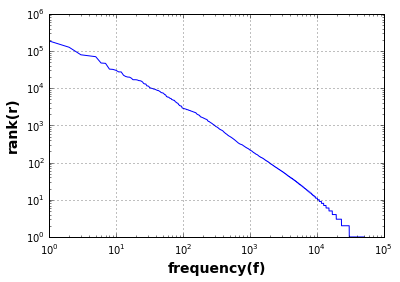

In [3]:
import matplotlib.pyplot as plt

# Count each token in each text of the Gutenberg collection
fd = FreqDist()
for text in gutenberg.fileids():
    for word in gutenberg.words(text):
        fd.inc(word)

# Initialize two empty lists which will hold our ranks and frequencies
ranks = []
freqs = []

# Generate a (rank, frequency) point for each counted token and # and append to the respective lists, Note that the iteration
# over fd is automatically sorted.
for rank, word in enumerate(fd):
    ranks.append(rank + 1)
    freqs.append(fd[word])

# Plot rank vs frequency on a log-log plot and show the plot
plt.loglog(ranks, freqs)
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)

### 3.4. Task 2: Predicting Words

Now that we have learnt how to explore a corpus, let’s define a task that can put such explorations to use.

**Task**: Train and build a word predictor, i.e., given a training corpus, write a program that can predict the word that follows a given word. Use this predictor to generate a random sentence of 20 words.

To build a word predictor, we first need to compute a distribution of two-word sequences over a training corpus, i.e., we need to keep count the occurrences of a word given the previous word as a context for that word. Once we have computed such a distribution, we can use the input word to find a list of all possible words that followed it in the training corpus and then output a word at random from this list. To generate a random sentence of 20 words, all we have to do is to start at the given word, predict the next word using this predictor, then the next and so on until we get a total of 20 words. The next set of cells illustrate how to accomplish this easily using the modules provided by NLTK. We use Jane Austen’s Persuasion as the training corpus.

In [8]:
from nltk import ConditionalFreqDist 
from random import choice

# Create conditional distribution object
cfd = ConditionalFreqDist()

# For each token, count current word given previous word
prev_word = None
for word in gutenberg.words('austen-persuasion.txt'):
    cfd[prev_word].inc(word)
    prev_word = word

# Start predicting at the given word, say ’therefore’
word = 'therefore'
i = 1

# Find all words that can possibly follow the current word and choose one at random
while i < 20:
    print(word, end=" ")
    lwords = list(cfd[word].samples())
    follower = choice(lwords)
    word = follower
    i += 1

therefore must begin kicking about my sensible , sweet scenes on an end in mind early warm feelings she 

**Solution**: The 20 word output sentence is, of course, not grammatical but every two word sequence will be because the training corpus that we used for estimating our conditional frequency distribution is grammatical and because of the way that we estimated the conditional frequency distribu- tion. Note that for our task we used only the previous word as the context for our predictions. It is certainly possible to use the previous two or, even, three words as the prediction context.

### 3.5. Task 3: Discovering Part-Of-Speech Tags

NLTK comes with an excellent set of modules to allow us to train and build relatively sophisticated POS taggers. However, for this task, we will restrict ourselves to a simple analysis on an already tagged corpus included with NLTK.

**Task**: Tokenize the included Brown Corpus and build one or more suitable data structures so that you can answer the following questions:

- What is the most frequent tag?


- Which word has the most number of distinct tags?


- What is the ratio of masculine to feminine pronouns?


- How many words are ambiguous, in the sense that they appear with at least two tags ?


For this task, it is important to note that there is are two versions of the Brown corpus that comes bundled with NLTK: the first is the raw corpus that we used in the last two tasks, and the second is a tagged version wherein each token of each sentence of the corpus has been annotated with the correct POS tags. Each sentence in this version of a corpus is represented as a list of 2-tuples, each of the form (token, tag). For example, a sentence like “`the ball is green`”, from a tagged corpus, will be represented inside NLTK as the list `[('the','at'), ('ball','nn'), ('is',’vbz'), ('green','jj')]` .

As explained before, the Brown corpus comprises of 15 different sections, represented by the letters 'a' through 'r'. Each of the sections represents a different genre of text and for certain NLP tasks not discussed in this article, this division proves very useful. Given this information, all we should have to do is build the data structures to analyze this tagged corpus. Looking at the kinds of questions that we need to answer, it will be sufficient to build a frequency distribution over the POS tags and a conditional frequency distribution over the tags using the tokens as the context. The next set of cells illustrate the solution for the task.

In [10]:
from nltk.corpus import brown
from nltk import FreqDist, ConditionalFreqDist
fd = FreqDist()
cfd = ConditionalFreqDist()

# for each tagged sentence in the corpus, get the (token, tag) pair and update
# both count(tag) and count(tag given token)
for sentence in brown.tagged_sents():
    for (token, tag) in sentence:
        fd.inc(tag)
        cfd[token].inc(tag)

# The most frequent tag is ...
fd.max()

'NN'

In [12]:
# Initialize a list to hold (numtags,word) tuple
wordbins = []

# append each (n(unique tags for token),token) tuple to list
for token in cfd.conditions():
    wordbins.append((cfd[token].B(), token))

# sort tuples by number of unique tags (highest first)
wordbins.sort(reverse=True)

# the token with the maximum number of possible part-of-speech tags is ...
print(wordbins[0])

(12, 'that')


In [13]:
# masculine pronouns
male = ['he', 'his', 'him', 'himself']

# feminine pronouns
female = ['she', 'hers', 'her', 'herself']

# initialize counters
n_male, n_female = 0, 0

# total number of masculine samples
for m in male:
    n_male += cfd[m].N()

# total number of feminine samples
for f in female:
    n_female += cfd[f].N()

# calculate required ratio
print(float(n_male)/n_female)

3.2576884422110552


In [14]:
n_ambiguous = 0
for (ntags, token) in wordbins:
    if ntags > 1:
        n_ambiguous += 1

# number of tokens with more than a single POS tag
print(n_ambiguous)

8729


**Solution**: The most frequent POS tag in the Brown corpus is, unsurprisingly, the noun (NN). The word that has the most number of unique tags is, in fact, the word `that`. There are almost 3 times as many masculine pronouns in the corpus as feminine pronouns and, finally, there are as many as 8700 words in the corpus that can be deemed ambiguous - a number that should indicate the difficulty of the POS-tagging task.


### 3.6. Task 4: Word Association

The task of free word association is a very common one when it comes to psycholinguistics, especially in the context of lexical retrieval -- human subjects respond more readily to a word if it follows another highly associated word as opposed to a completely unrelated word. The instructions for performing the association are fairly straightforward -- the subject is asked for the word that immediately comes to mind upon hearing a particular word.

**Task**: Use a large POS-tagged text corpus to perform free word association. You may ignore function words and assume that the words to be associated are always nouns.

For this task, we will use the concept of word co-occurrences, i.e., counting the number of times words occur in close proximity with each other and then using these counts to estimate the degree of association. For each token in each sentence, we will look at all following tokens that lie within a fixed window and count their occurrences in this context using a con- ditional frequency distribution. The next set of cells show how we accomplish this using Python and NLTK with a window size of 5 and the POS-tagged version of the Brown corpus.

In [15]:
from nltk.corpus import brown, stopwords

# initialize a new conditional distribution
cfd = ConditionalFreqDist()

# get a list of English stopwords
stopwords_list = stopwords.words('english')

def is_noun(tag):
    return tag.lower() in ['nn','nns','nn$','nn-tl','nn+bez', 'nn+hvz', 
                           'nns$','np','np$','np+bez','nps', 'nps$','nr',
                           'np-tl','nrs','nr$']

for sentence in brown.tagged_sents():
    for (index, tagtuple) in enumerate(sentence):
        (token, tag) = tagtuple
        token = token.lower()
        if token not in stopwords_list and is_noun(tag):
            window = sentence[index+1:index+5]
            for (window_token, window_tag) in window:
                window_token = window_token.lower()
                if window_token not in stopwords_list and is_noun(window_tag):
                    cfd[token].inc(window_token)

In [17]:
# OK. We are done ! Let's start associating !
print(cfd['left'].max())

right


In [18]:
print(cfd['life'].max())

death


In [19]:
print(cfd['man'].max())

woman


In [20]:
print(cfd['woman'].max())

world


In [21]:
print(cfd['boy'].max())

girl


In [22]:
print(cfd['girl'].max())

trouble


In [23]:
print(cfd['male'].max())

female


In [24]:
print(cfd['ball'].max())

player


In [25]:
print(cfd['doctor'].max())

bills


In [26]:
print(cfd['road'].max())

block


The “word associator” that we have built seems to work surprisingly well, especially when compared to the minimal amount of effort that was required. (In fact, in the context of folk psychology, our associator would almost seem to have a personality, albeit a pessimistic and misogynistic one). The results of this task should be a clear indication of the usefulness of corpus linguistics in general. As a further exercise, the association task can be easily extended in sophistication by utilizing parsed corpora and using information-theoretic measures of association [3].

## 4. Discussion

Although this article used Python and NLTK to provide an introduction to basic natural language processing, it is important to note that there are other NLP frameworks, besides NLTK, that are used by the NLP academic and industrial community. A popular example is GATE (General Architecture for Text Engineering), developed by the NLP research group at the University of Sheffield [4]. GATE is built on the Java and provides, besides the framework, a general architecture which describes how language pro- cessing components connect to each other and a graphical environment. GATE is freely available and is primarily used for text mining and information extraction.

Every programming language and framework has its own strengths and weaknesses. For this article, we chose to use Python because it possesses a number of advantages over the other programming languages such as: (a) readability (b) easy to use object-oriented paradigm (c) easily extensible (d) strong unicode support and, (e) a powerful standard library. It is also extremely robust and efficient and has been used in com- plex and large-scale NLP projects such as a state-of-the-art machine translation decoder [2].


## 5. Conclusions
Natural Language Processing is a very active field of research and attracts many graduate students every year. It allows a coherent study of the hu- man language from the vantage points of several disciplines -- Linguistics, Psychology, Computer Science and Mathematics. Another, perhaps more important, reason for choosing NLP as an area of graduate study is the sheer number of very interesting problems with well-established constraints but no general solutions. For example, the original problem of machine translation, which spurred the growth of the field, remains, even after two decades of intriguing and active research, one of the hardest problems to solve. There are several other cutting-edge areas in NLP that currently draw a large amount of research activity. It would be informative to discuss a few of them here:

- **Syntax-based Machine Translation**: For the past decade or so, most of the research in machine translation has focussed on using statisti- cal methods on very large corpora to learn translations of words and phrases. However, more and more researchers are starting to incor- porate syntax into such methods [10].


- **Automatic Multi-document Text Summarization**: There are a large number of efforts underway to use computers to automatically generate coherent and informative summaries for a cluster of related documents [8]. This task is considerably more difficult compared to generating a summary for a single document because there may be redun- dant information present across multiple documents.

- **Computational Parsing**: Although the problem of using probabilistic models to automatically generating syntactic structures for a given input text has been around for a long time, there are still significant improvements to be made. The most challenging task is to be able to parse, with reasonable accuracy, languages that exhibit very different linguistic properties when compared to English, such as Chinese [7] and Arabic.

Python and the Natural Language Toolkit (NLTK) allow any programmer to get acquainted with NLP tasks easily without having to spend too much time on gathering resources. This article is intended to make this task even easier by providing working examples and references for anyone interested in learning about NLP.

## 6. Biography

Nitin Madnani is a research scientist at Educational Testing Service. He was previously a Ph.D. student in the Department of Computer Science at University of Maryland, College Park and a graduate research assistant with the Institute for Advanced Computer Studies. He works in the area of statistical natural language processing, specifically paraphrasing, machine translation and text summarization. His language of choice for all tasks, big or small, is Python.

## References

1. Dan Bikel. 2004. On the Parameter Space of Generative Lexicalized Statistical Parsing Models. Ph.D. Thesis. http://www.cis.upenn.edu/~dbikel/papers/thesis.pdf

2. David Chiang. 2005. A hierarchical phrase-based model for statistical machine translation. Proceedings of ACL.

3. Kenneth W. Church and Patrick Hanks. 1990. Word association norms, mutual information, and lexicography. Computational Linguistics. 16(1).

4. H. Cunningham, D. Maynard, K. Bontcheva. and V. Tablan. 2002. GATE: A Framework and Graphical Development Environment for Robust NLP Tools and Applications. Proceedings of the 40th Anniversary Meet- ing of the Association for Computational Linguistics.

5. Michael Hart and Gregory Newby. Project Gutenberg. Proceedings of the 40th Anniversary Meeting of the Association for Computational Linguistics. http://www.gutenberg.org/wiki/Main_Page

6. H. Kucera and W. N. Francis. 1967. Computational Analysis of Present-Day American English. Brown University Press, Providence, RI.

7. Roger Levy and Christoper D. Manning. 2003. Is it harder to parse Chinese, or the Chinese Treebank? Proceedings of ACL.

8. Dragomir R. Radev and Kathy McKeown. 1999. Generating natural language summaries from multiple on-line sources. Computational Lin- guistics. 24:469-500.

9. Adwait Ratnaparkhi 1996. A Maximum Entropy Part-Of-Speech Tagger. Proceedings of Empirical Methods on Natural Language Processing.

10. Dekai Wu and David Chiang. 2007. Syntax and Structure in Statistical Translation. Workshop at HLT-NAACL.

11. The Official Python Tutorial. https://docs.python.org/3.4/tutorial/

12. Natural Language Toolkit. http://nltk.org

13. NLTK Book/Tutorial. http://www.nltk.org/book/